In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Smartphone_cleaned_v3.csv")

In [3]:
df.head(2)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor,processor_brand,num_cores,...,screen_size_inches,resolution_width,resolution_height,refresh_rate_Hz,num_rear_cameras,num_front_cameras,primary_rear_camera_mp,primary_front_camera_mp,operating_system,extended_memory
0,realme,Realme P4 Pro 5G,24999,73,Yes,No,Yes,Snapdragon 7 Gen 4,snapdragon,Octa Core,...,6.80,1280,2800,144.0,2,1.0,50.0,50.0,Android,0
1,realme,Realme P4 5G,18499,77,Yes,No,Yes,Dimensity 7400 Ultra,mediatek,Octa Core,...,6.77,1080,2392,144.0,2,1.0,50.0,16.0,Android,0


In [4]:
numerical_columns = list(df.select_dtypes(include='number').columns)
categorical_columns = list(df.select_dtypes(include='object').columns)
categorical_columns.remove("model")
categorical_columns.remove("processor")

In [53]:
x = df.groupby("brand_name").count()['model'] 
x[x > 10].index
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

In [5]:
numerical_columns

['price',
 'rating',
 'processor_speed_GHz',
 'ram_capacity',
 'internal_storage',
 'battery_capacity_mAh',
 'fast_charging_W',
 'screen_size_inches',
 'resolution_width',
 'resolution_height',
 'refresh_rate_Hz',
 'num_rear_cameras',
 'num_front_cameras',
 'primary_rear_camera_mp',
 'primary_front_camera_mp',
 'extended_memory']

In [6]:
categorical_columns

['brand_name',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'operating_system']

# 1. Continuous Vs Continuous


In [7]:
df[numerical_columns].corr()

,price,rating,processor_speed_GHz,ram_capacity,internal_storage,battery_capacity_mAh,fast_charging_W,screen_size_inches,resolution_width,resolution_height,refresh_rate_Hz,num_rear_cameras,num_front_cameras,primary_rear_camera_mp,primary_front_camera_mp,extended_memory
price,1.000000,0.635993,0.774547,0.583762,0.720487,-0.200430,0.153609,0.278153,0.544275,0.481702,0.210213,0.350426,0.454545,0.310337,0.218024,-0.398635
rating,0.635993,1.000000,0.720756,0.810734,0.658373,0.043265,0.560934,0.275208,0.568154,0.781560,0.583134,0.550113,0.230361,0.488838,0.581206,-0.340959
processor_speed_GHz,0.774547,0.720756,1.000000,0.623533,0.610184,-0.049839,0.376348,0.130125,0.523995,0.617527,0.323832,0.338740,0.215949,0.258021,0.312865,-0.467459
ram_capacity,0.583762,0.810734,0.623533,1.000000,0.700904,0.148468,0.611436,0.266675,0.528403,0.657691,0.531043,0.423557,0.222939,0.345306,0.543078,-0.417508
internal_storage,0.720487,0.658373,0.610184,0.700904,1.000000,0.026362,0.386631,0.289832,0.463898,0.497409,0.343432,0.343848,0.345056,0.297617,0.386899,-0.363030
battery_capacity_mAh,-0.200430,0.043265,-0.049839,0.148468,0.026362,1.000000,0.443818,0.313582,0.061478,0.115785,0.316867,-0.119401,-0.103110,-0.020284,0.212768,-0.047958
fast_charging_W,0.153609,0.560934,0.376348,0.611436,0.386631,0.443818,1.000000,0.248856,0.378197,0.594264,0.562234,0.272000,0.006314,0.200563,0.611326,-0.367302
screen_size_inches,0.278153,0.275208,0.130125,0.266675,0.289832,0.313582,0.248856,1.000000,0.343688,0.132900,0.329814,0.096762,0.514813,0.236414,0.127659,-0.035517
resolution_width,0.544275,0.568154,0.523995,0.528403,0.463898,0.061478,0.378197,0.343688,1.000000,0.478373,0.246668,0.431808,0.382938,0.285586,0.366119,-0.365395
resolution_height,0.481702,0.781560,0.617527,0.657691,0.497409,0.115785,0.594264,0.132900,0.478373,1.000000,0.490689,0.463770,0.026353,0.367841,0.546436,-0.398003


In [8]:
def plot_graphs(data, col1,col2):
    sns.relplot(data = df, x = col1, y = col2)

In [9]:
# for i in range (0,len(numerical_columns)):
#     for j in range (i +1, len(numerical_columns)):
#         #print(f"{numerical_columns[i]} * {numerical_columns[j]}")
#         plot_graphs(df, numerical_columns[i], numerical_columns[j])

Text(0, 0.5, 'internal_storage')

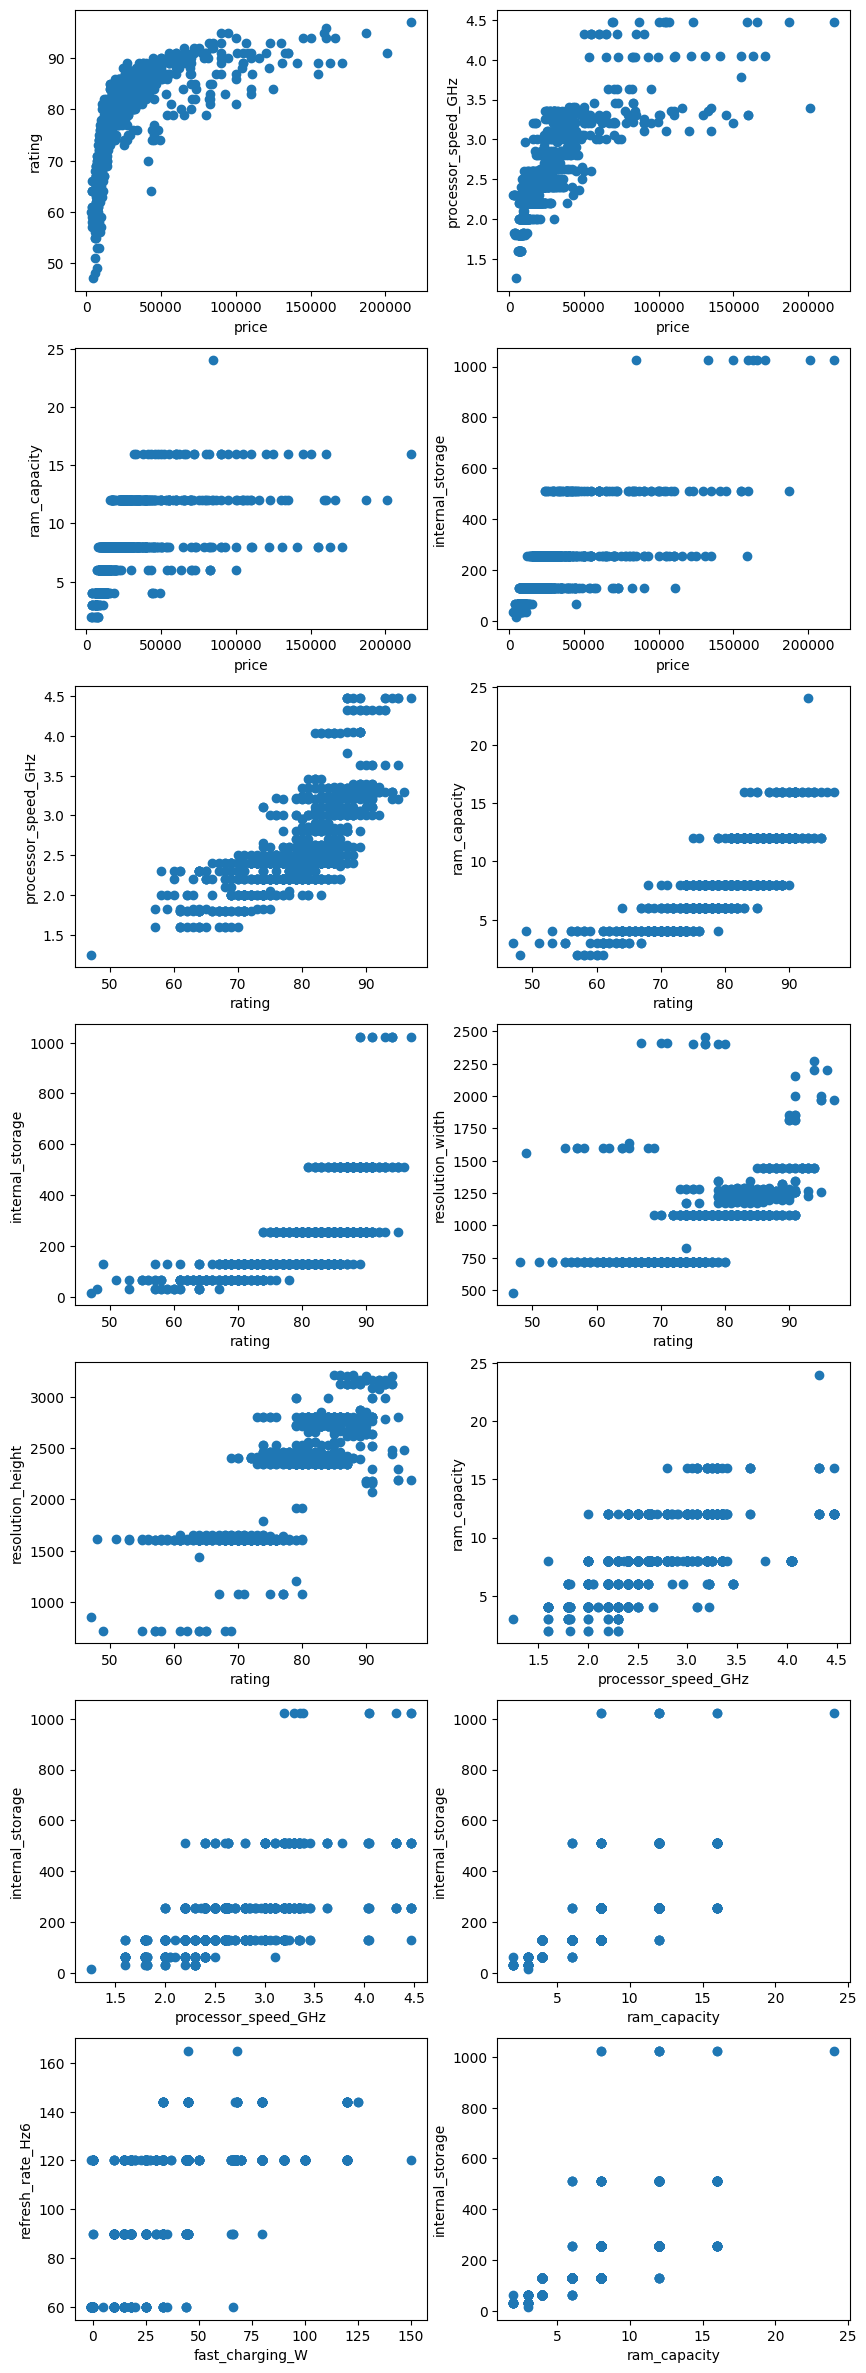

In [10]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(10,30))

ax[0,0].scatter(x = df['price'], y = df["rating"])
ax[0,0].set_xlabel("price")
ax[0,0].set_ylabel("rating")

ax[0,1].scatter(x = df['price'], y = df["processor_speed_GHz"])
ax[0,1].set_xlabel("price")
ax[0,1].set_ylabel("processor_speed_GHz")

ax[1,0].scatter(x = df['price'], y = df["ram_capacity"])
ax[1,0].set_xlabel("price")
ax[1,0].set_ylabel("ram_capacity")

ax[1,1].scatter(x = df['price'], y = df["internal_storage"])
ax[1,1].set_xlabel("price")
ax[1,1].set_ylabel("internal_storage")

ax[2,0].scatter(x = df['rating'], y = df["processor_speed_GHz"])
ax[2,0].set_xlabel("rating")
ax[2,0].set_ylabel("processor_speed_GHz")

ax[2,1].scatter(x = df['rating'], y = df["ram_capacity"])
ax[2,1].set_xlabel("rating")
ax[2,1].set_ylabel("ram_capacity")

ax[3,0].scatter(x = df['rating'], y = df["internal_storage"])
ax[3,0].set_xlabel("rating")
ax[3,0].set_ylabel("internal_storage")

ax[3,1].scatter(x = df['rating'], y = df["resolution_width"])
ax[3,1].set_xlabel("rating")
ax[3,1].set_ylabel("resolution_width")

ax[4,0].scatter(x = df['rating'], y = df["resolution_height"])
ax[4,0].set_xlabel("rating")
ax[4,0].set_ylabel("resolution_height")

ax[4,1].scatter(x = df['processor_speed_GHz'], y = df["ram_capacity"])
ax[4,1].set_xlabel("processor_speed_GHz")
ax[4,1].set_ylabel("ram_capacity")

ax[5,0].scatter(x = df['processor_speed_GHz'], y = df["internal_storage"])
ax[5,0].set_xlabel("processor_speed_GHz")
ax[5,0].set_ylabel("internal_storage")

ax[5,1].scatter(x = df['ram_capacity'], y = df["internal_storage"])
ax[5,1].set_xlabel("ram_capacity")
ax[5,1].set_ylabel("internal_storage")

ax[6,0].scatter(x = df['fast_charging_W'], y = df["refresh_rate_Hz"])
ax[6,0].set_xlabel("fast_charging_W")
ax[6,0].set_ylabel("refresh_rate_Hz6")

ax[6,1].scatter(x = df['ram_capacity'], y = df["internal_storage"])
ax[6,1].set_xlabel("ram_capacity")
ax[6,1].set_ylabel("internal_storage")


# 2. Continuous Vs Categorical

In [12]:
def bar_plot(data, categorical_column, numerical_column):
    sns.catplot(data = df, x = categorical_column, y = numerical_column, kind = "bar")

In [14]:
# for i in range (0,len(categorical_columns)):
#     for j in range (0 , len(numerical_columns)):
#         #print(f"{categorical_columns[i]} * {numerical_columns[j]}")
#         bar_plot(df, categorical_columns[i], numerical_columns[j])

In [51]:
numerical_columns

['price',
 'rating',
 'processor_speed_GHz',
 'ram_capacity',
 'internal_storage',
 'battery_capacity_mAh',
 'fast_charging_W',
 'screen_size_inches',
 'resolution_width',
 'resolution_height',
 'refresh_rate_Hz',
 'num_rear_cameras',
 'num_front_cameras',
 'primary_rear_camera_mp',
 'primary_front_camera_mp',
 'extended_memory']

In [52]:
categorical_columns

['brand_name',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'operating_system']

In [66]:
temp_df.groupby("brand_name")["price"].mean().reset_index().sort_values(by = "price", ascending = False)

,brand_name,price
0,apple,90582.354839
1,google,62855.500000
12,samsung,42619.543046
8,oneplus,40636.692308
7,nothing,29872.500000
14,vivo,27423.761538
3,iqoo,26647.789474
9,oppo,26045.746479
6,motorola,20505.745455
13,tecno,19216.790698


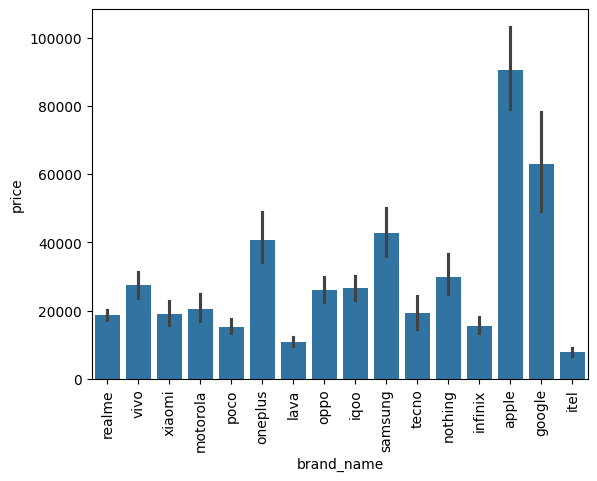

In [58]:
sns.barplot(data = temp_df, x = "brand_name", y = "price", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [64]:
temp_df.groupby("brand_name")["rating"].mean().reset_index().sort_values(by = "rating", ascending = False)

,brand_name,rating
7,nothing,85.312500
8,oneplus,85.076923
0,apple,83.000000
1,google,82.772727
12,samsung,81.423841
3,iqoo,80.526316
6,motorola,79.690909
14,vivo,79.538462
9,oppo,78.788732
2,infinix,77.906977


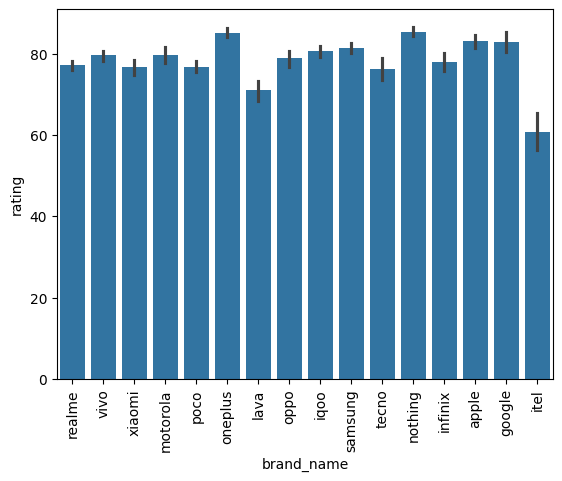

In [65]:
sns.barplot(data = temp_df, x = "brand_name", y = "rating", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [73]:
temp_df.groupby("brand_name")["fast_charging_W"].mean().reset_index().sort_values(by = "fast_charging_W", ascending = False)

,brand_name,fast_charging_W
8,oneplus,85.000000
3,iqoo,72.157895
9,oppo,58.436620
14,vivo,56.376923
11,realme,53.047619
7,nothing,47.437500
6,motorola,42.163636
15,xiaomi,40.338028
10,poco,38.060000
2,infinix,35.767442


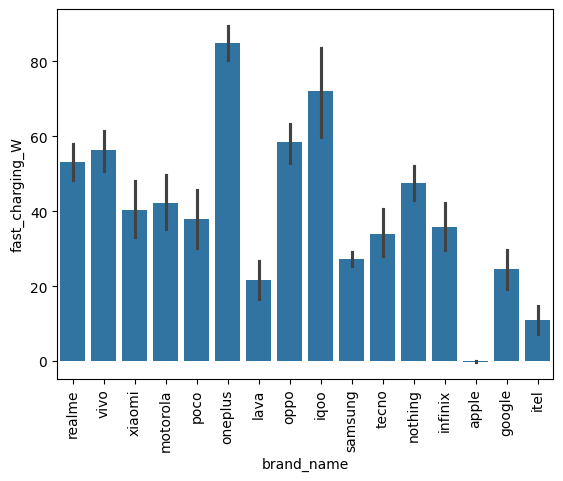

In [74]:
sns.barplot(data = temp_df, x = "brand_name", y = "fast_charging_W", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [106]:
temp_df.groupby("has_5g")["price"].median().reset_index().sort_values(by = "price", ascending = False)

,has_5g,price
1,Yes,22999.0
0,No,8499.0


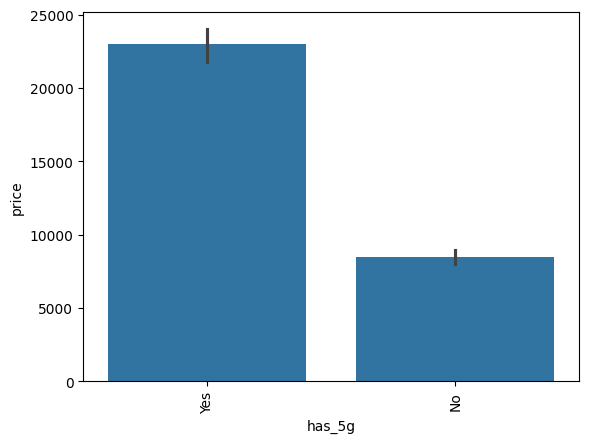

In [105]:
sns.barplot(data = temp_df, x = "has_5g", y = "price", estimator='median')
plt.xticks(rotation = 'vertical' )
plt.show()

In [85]:
temp_df.groupby("has_5g")["rating"].mean().reset_index().sort_values(by = "rating", ascending = False)

,has_5g,rating
1,Yes,81.313997
0,No,67.913978


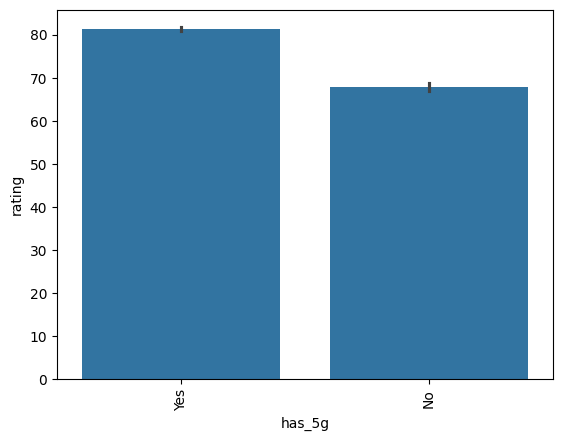

In [90]:
sns.barplot(data = temp_df, x = "has_5g", y = "rating", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [102]:
temp_df.groupby("has_nfc")["price"].median().reset_index().sort_values(by = "price", ascending = False)

,has_nfc,price
1,Yes,34999.0
0,No,13998.0


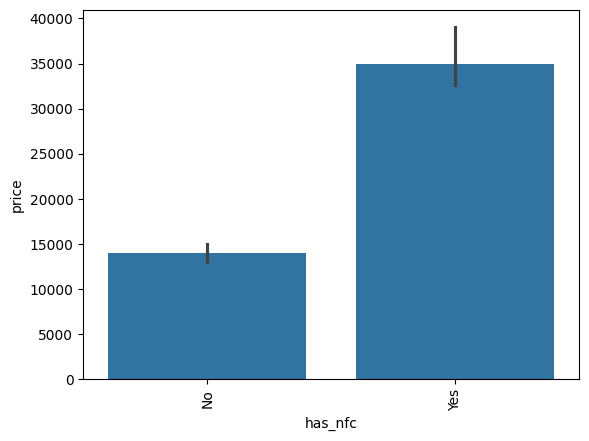

In [103]:
sns.barplot(data = temp_df, x = "has_nfc", y = "price", estimator='median')
plt.xticks(rotation = 'vertical' )
plt.show()

In [94]:
temp_df.groupby("has_nfc")["rating"].mean().reset_index().sort_values(by = "rating", ascending = False)

,has_nfc,rating
1,Yes,84.833780
0,No,75.034653


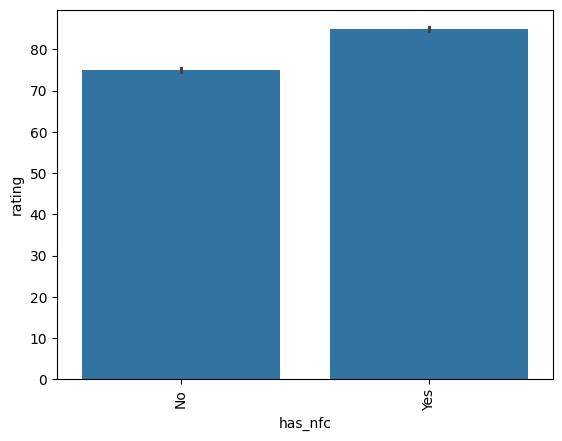

In [95]:
sns.barplot(data = temp_df, x = "has_nfc", y = "rating", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [97]:
temp_df.groupby("has_ir_blaster")["price"].median().reset_index().sort_values(by = "price", ascending = False)

,has_ir_blaster,price
1,Yes,24599.0
0,No,17499.0


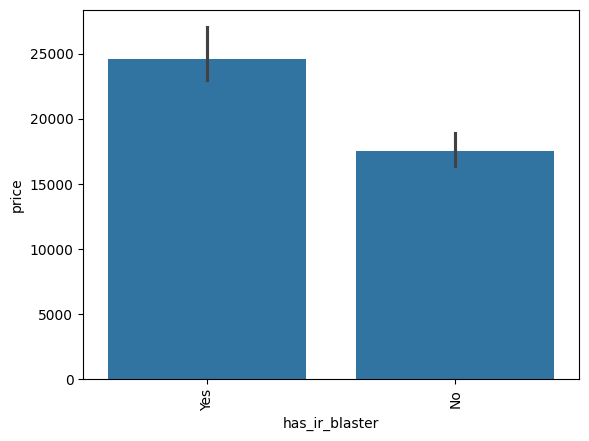

In [99]:
sns.barplot(data = temp_df, x = "has_ir_blaster", y = "price", estimator='median')
plt.xticks(rotation = 'vertical' )
plt.show()

In [98]:
temp_df.groupby("has_ir_blaster")["rating"].mean().reset_index().sort_values(by = "rating", ascending = False)

,has_ir_blaster,rating
1,Yes,81.774704
0,No,77.720386


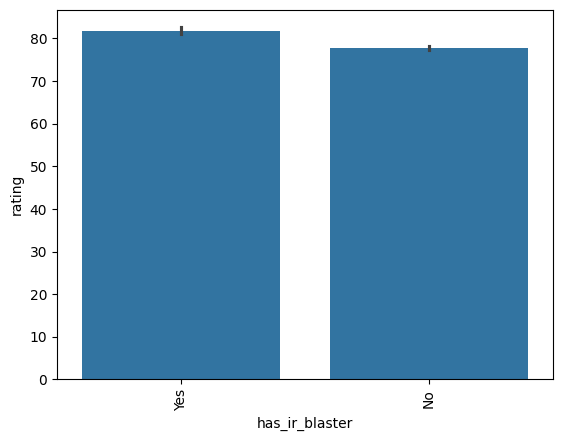

In [101]:
sns.barplot(data = temp_df, x = "has_ir_blaster", y = "rating", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [107]:
temp_df.groupby("processor_brand")["price"].median().reset_index().sort_values(by = "price", ascending = False)

,processor_brand,price
0,bionic,82900.0
4,tensor,46499.0
3,snapdragon,25973.0
1,exynos,25480.0
2,mediatek,15999.0
5,tiger,8746.5
6,unisoc,7199.0


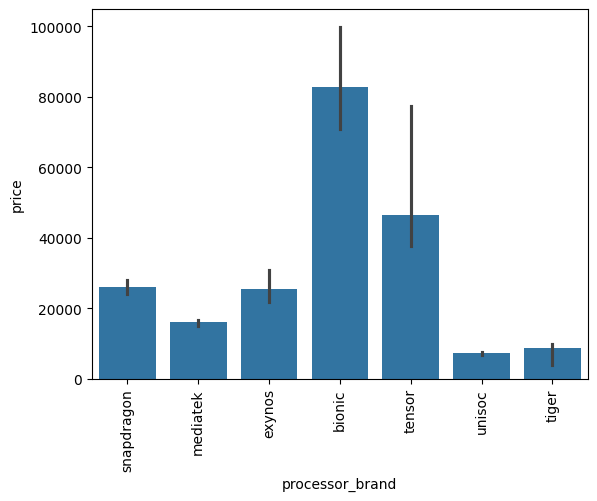

In [109]:
sns.barplot(data = temp_df, x = "processor_brand", y = "price", estimator='median')
plt.xticks(rotation = 'vertical' )
plt.show()

In [110]:
temp_df.groupby("processor_brand")["rating"].mean().reset_index().sort_values(by = "rating", ascending = False)

,processor_brand,rating
0,bionic,83.000000
4,tensor,82.772727
3,snapdragon,82.580645
1,exynos,81.428571
2,mediatek,77.746392
5,tiger,66.928571
6,unisoc,64.196721


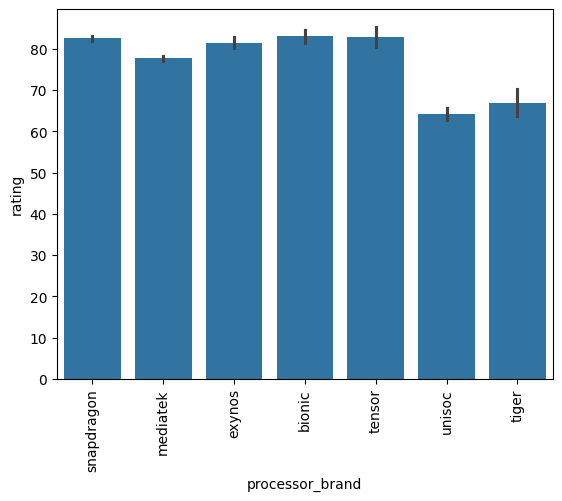

In [111]:
sns.barplot(data = temp_df, x = "processor_brand", y = "rating", estimator='mean')
plt.xticks(rotation = 'vertical' )
plt.show()

In [67]:
numerical_columns

['price',
 'rating',
 'processor_speed_GHz',
 'ram_capacity',
 'internal_storage',
 'battery_capacity_mAh',
 'fast_charging_W',
 'screen_size_inches',
 'resolution_width',
 'resolution_height',
 'refresh_rate_Hz',
 'num_rear_cameras',
 'num_front_cameras',
 'primary_rear_camera_mp',
 'primary_front_camera_mp',
 'extended_memory']

# 3. Categorical Vs Categorical

In [16]:
categorical_columns

['brand_name',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'operating_system']

In [25]:
def plot_graphs(data, col1,col2):
    crosstab = pd.crosstab(data[col1], data[col2])
    print(crosstab)
    print("***********************************************")
    # sns.heatmap(crosstab, annot = True, fmt = "d" )

In [46]:
# for i in range (0,len(categorical_columns)):
#     for j in range (i +1, len(categorical_columns)):
#         #print(f"{numerical_columns[i]} * {numerical_columns[j]}")
#         plot_graphs(df, categorical_columns[i], categorical_columns[j])

<Axes: xlabel='has_5g', ylabel='brand_name'>

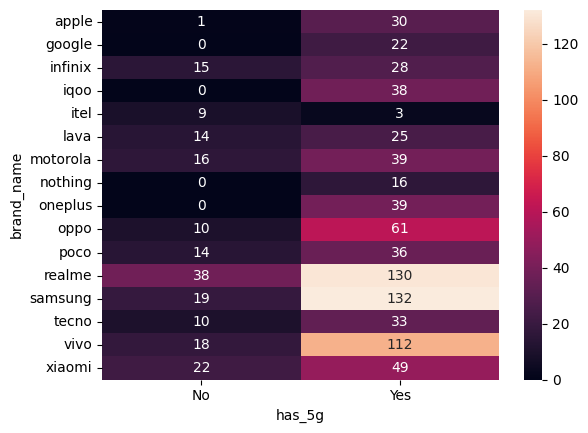

In [37]:
crosstab = pd.crosstab(temp_df["brand_name"], temp_df["has_5g"])
sns.heatmap(crosstab, annot = True, fmt = "d")

<Axes: xlabel='has_nfc', ylabel='brand_name'>

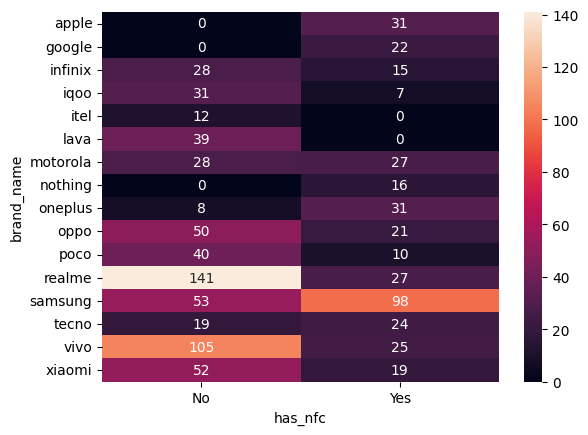

In [38]:
crosstab = pd.crosstab(temp_df["brand_name"], temp_df["has_nfc"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='has_ir_blaster', ylabel='brand_name'>

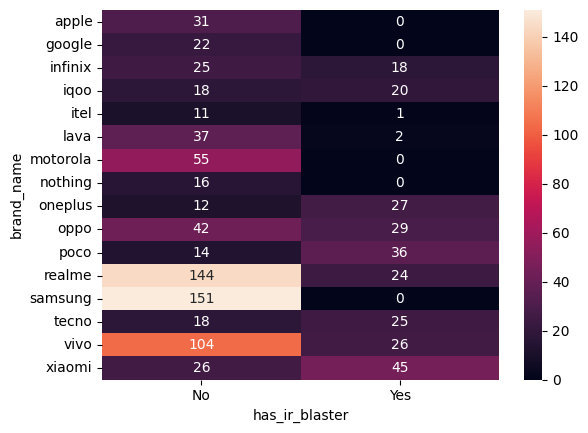

In [39]:
crosstab = pd.crosstab(temp_df["brand_name"], temp_df["has_ir_blaster"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='processor_brand', ylabel='brand_name'>

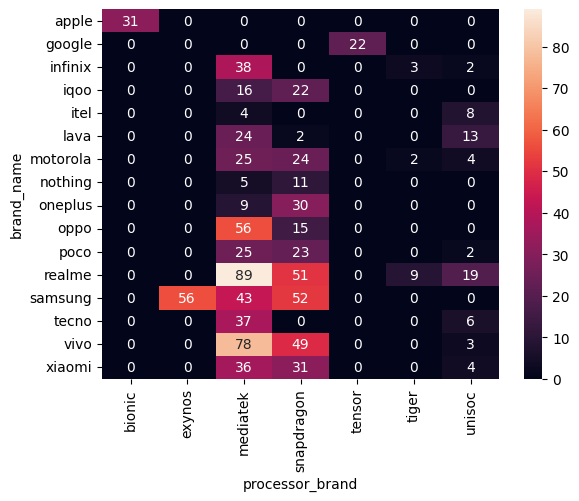

In [40]:
crosstab = pd.crosstab(temp_df["brand_name"], temp_df["processor_brand"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='has_nfc', ylabel='has_5g'>

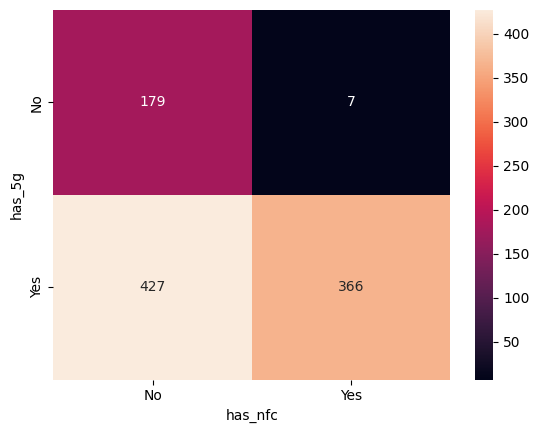

In [41]:
crosstab = pd.crosstab(temp_df["has_5g"], temp_df["has_nfc"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='has_ir_blaster', ylabel='has_5g'>

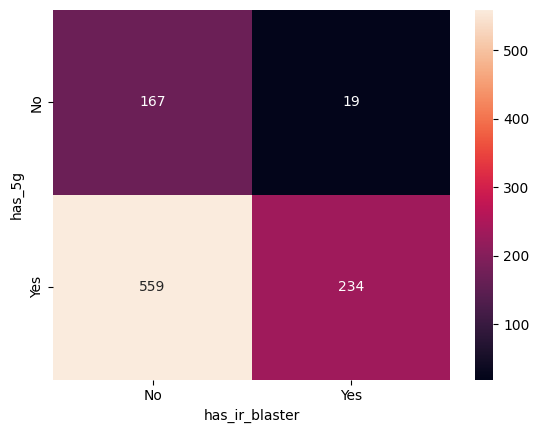

In [42]:
crosstab = pd.crosstab(temp_df["has_5g"], temp_df["has_ir_blaster"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='processor_brand', ylabel='has_5g'>

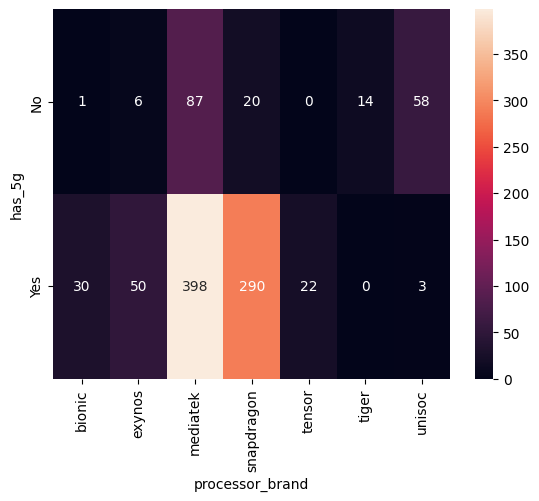

In [43]:
crosstab = pd.crosstab(temp_df["has_5g"], temp_df["processor_brand"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='processor_brand', ylabel='has_nfc'>

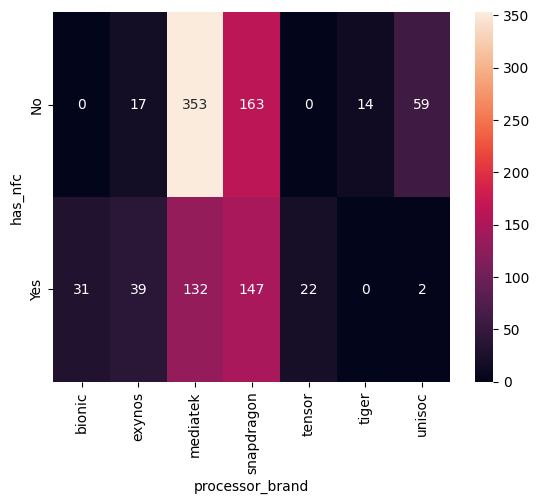

In [44]:
crosstab = pd.crosstab(temp_df["has_nfc"], temp_df["processor_brand"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

<Axes: xlabel='processor_brand', ylabel='has_ir_blaster'>

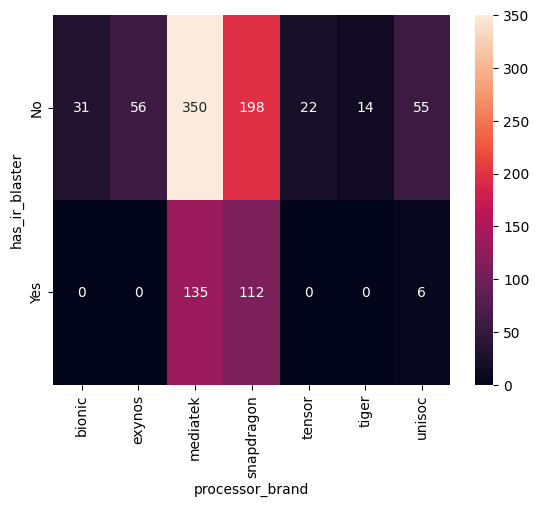

In [45]:
crosstab = pd.crosstab(temp_df["has_ir_blaster"], temp_df["processor_brand"])
sns.heatmap(crosstab, annot = True, fmt = "d" )

# Multivariate Analysis

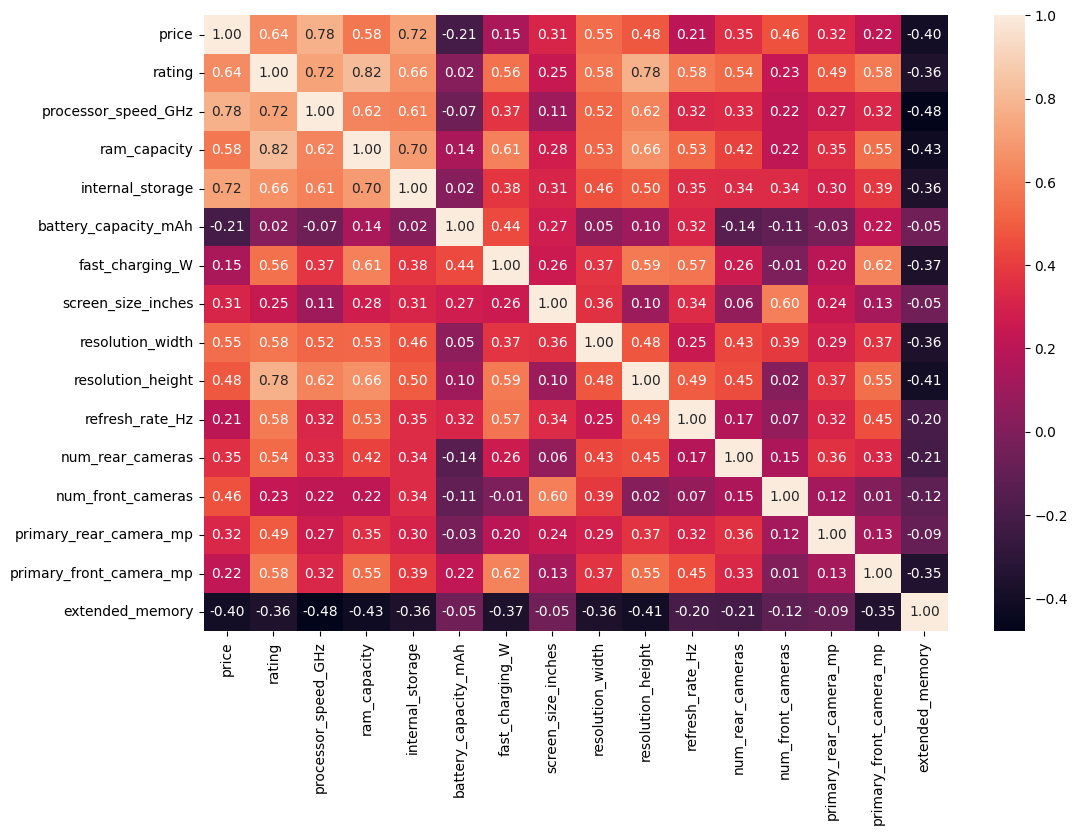

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(temp_df.corr(numeric_only=True),annot=True,fmt='.2f')
plt.show()

<Figure size 1200x800 with 0 Axes>

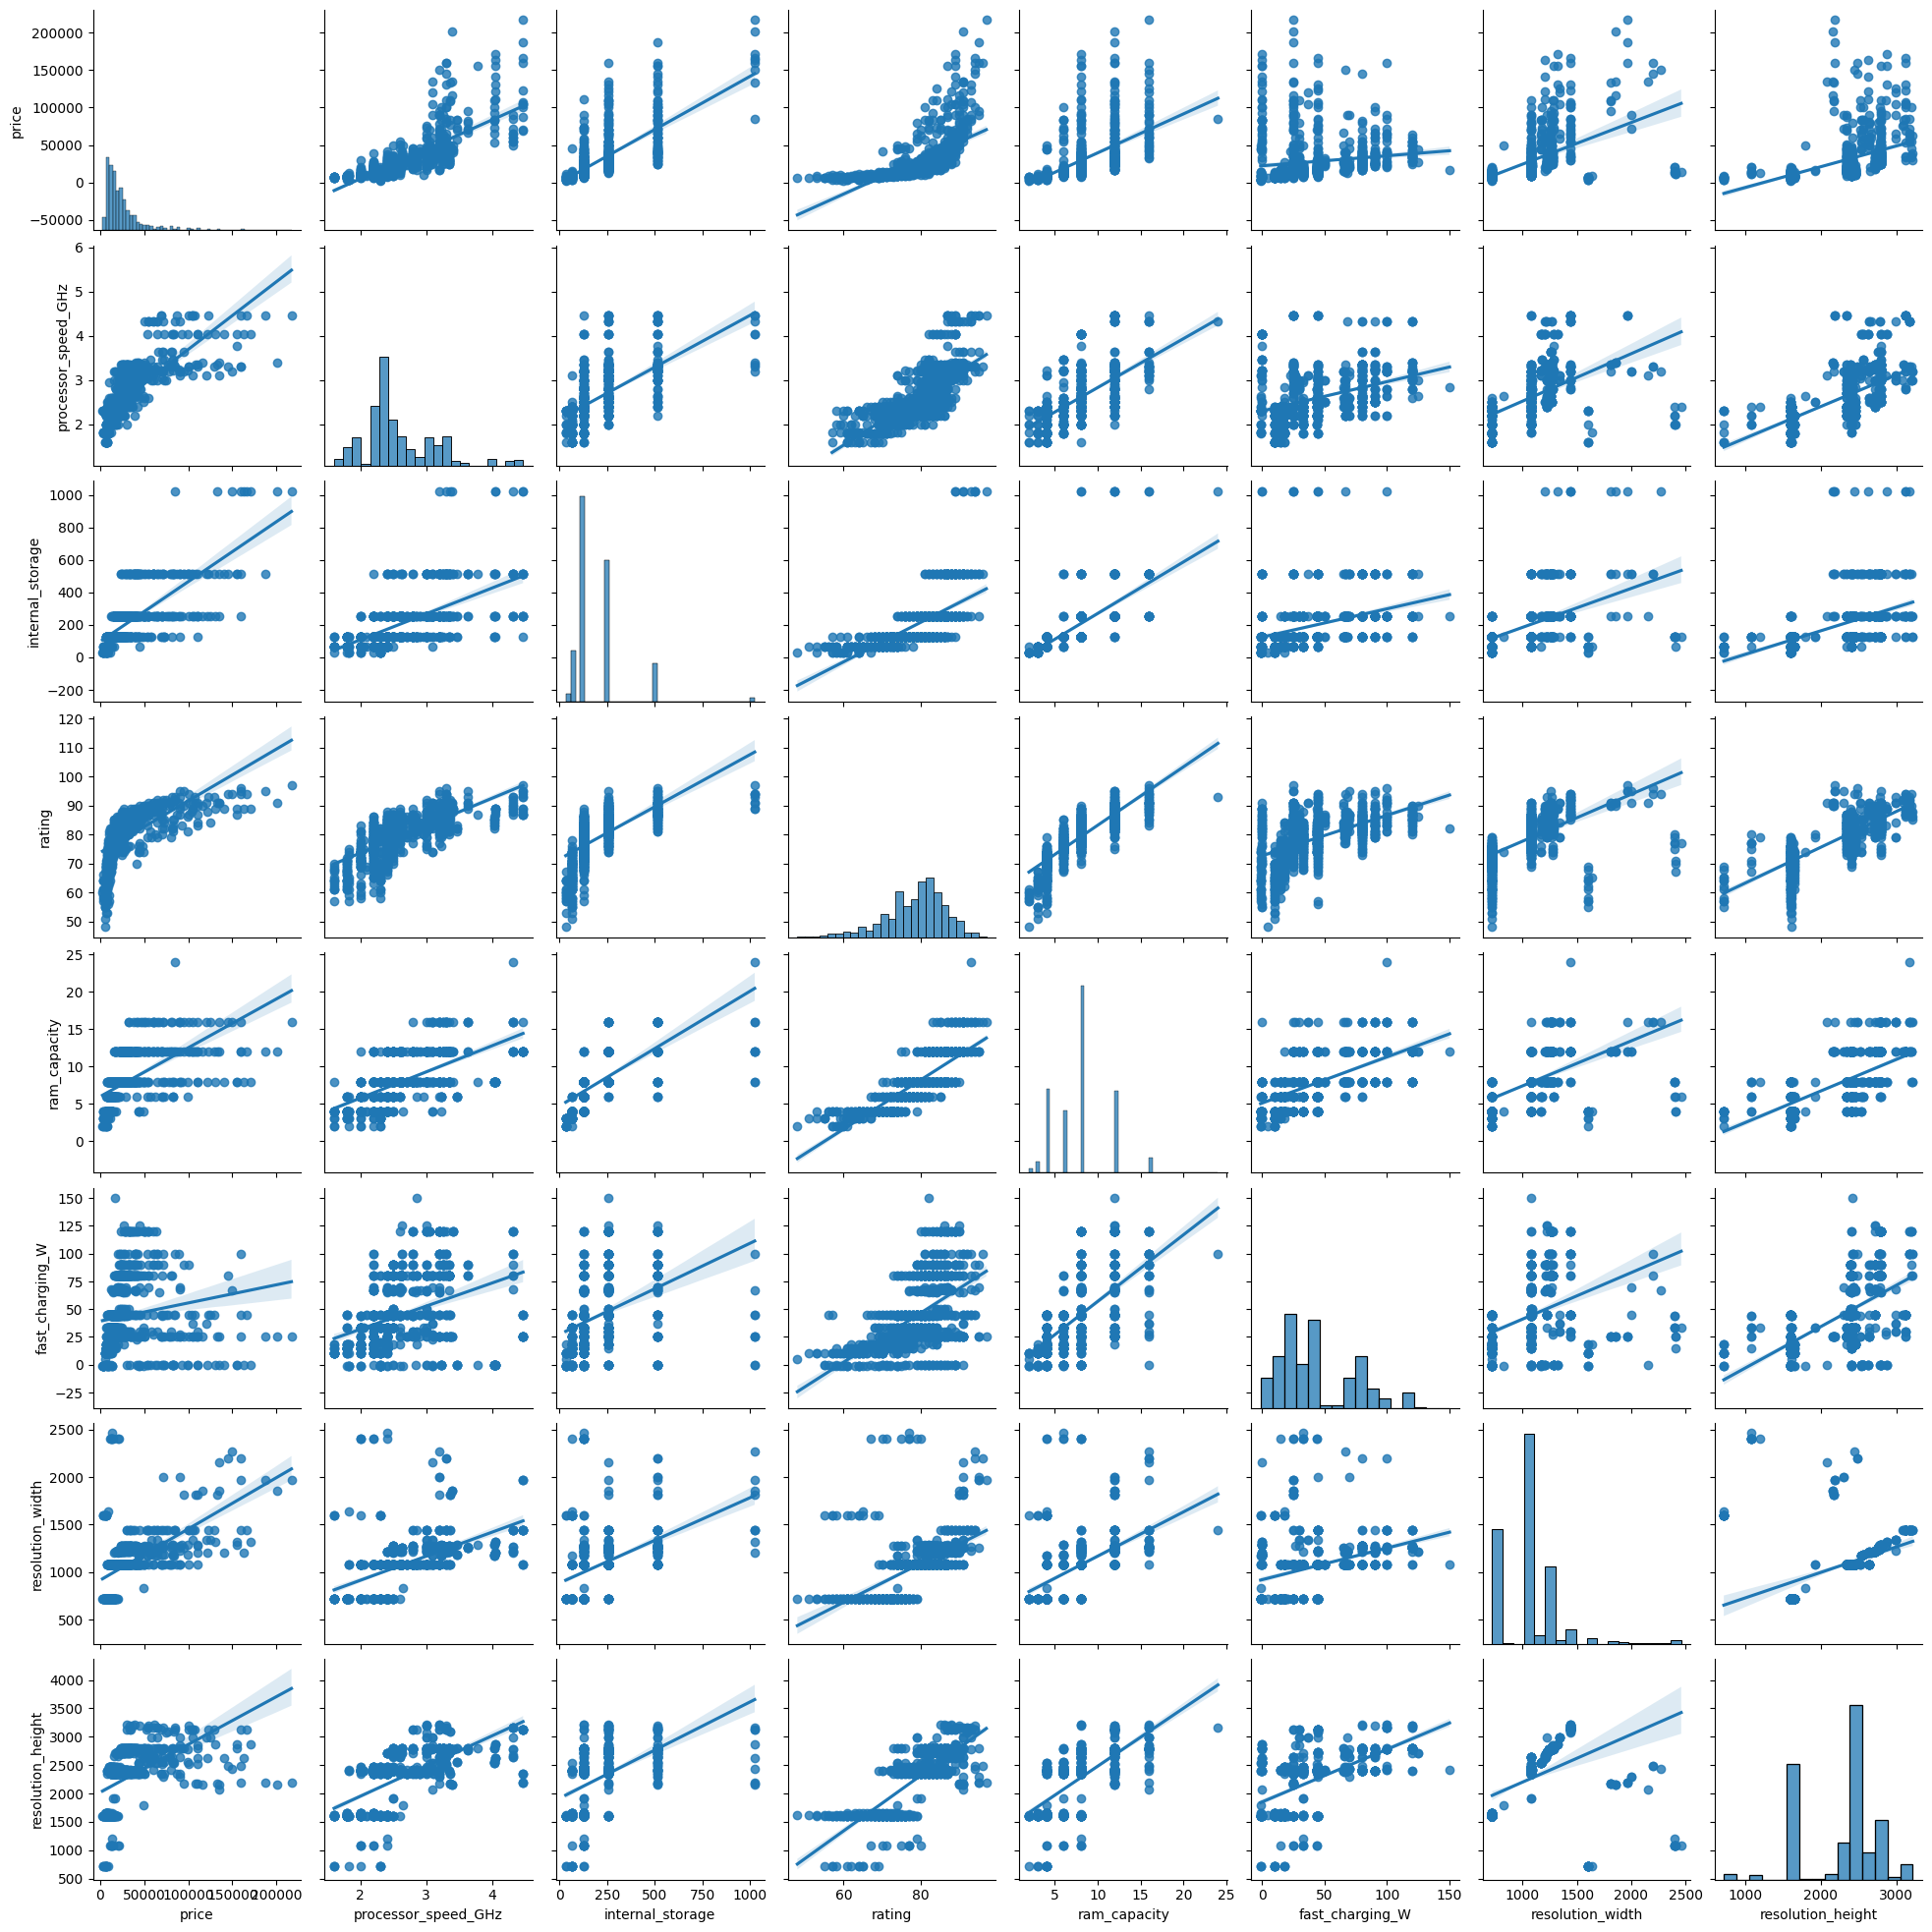

In [50]:
plt.figure(figsize=(12,8))
sns.pairplot(data = temp_df, vars = ["price", "processor_speed_GHz","internal_storage", "rating", "ram_capacity","fast_charging_W","resolution_width","resolution_height"], kind = "reg")
plt.show()